In [148]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [93]:
train = pd.read_csv("iris.data" , names=["A", "B", "C", "D"]) # Added titles to collumn

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 150 entries, 5.1 to 5.9
Data columns (total 4 columns):
A    150 non-null float64
B    150 non-null float64
C    150 non-null float64
D    150 non-null object
dtypes: float64(3), object(1)
memory usage: 5.9+ KB


In [95]:
train.head()

,A,B,C,D
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [96]:
train['D'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: D, dtype: int64

In [97]:
label = LabelEncoder()
train['D'] = label.fit_transform(train['D'])
train.head()

,A,B,C,D
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 150 entries, 5.1 to 5.9
Data columns (total 4 columns):
A    150 non-null float64
B    150 non-null float64
C    150 non-null float64
D    150 non-null int64
dtypes: float64(3), int64(1)
memory usage: 5.9 KB


In [99]:
kmeans = KMeans(n_clusters=3).fit(train) #seting k=3 It's a number of clusters

In [100]:
print('Inertia:', model.inertia_)
print('Centroids:', model.cluster_centers_)

Inertia: 173.23922119644567
Centroids: [[7.475      3.125      6.3        2.05       2.        ]
 [6.3        2.925      5.0328125  1.790625   1.59375   ]
 [5.18493151 3.14931507 2.25616438 0.55342466 0.32876712]]


In [109]:
final_centroids = []
final_inertia = []
    
for sample in range(5): #Number of Attempt is 5
    print('\nCentroid attempt: ', sample)
    model = KMeans(n_clusters=3, init='random', max_iter=1, n_init=1)
    model.fit(train)
    inertia_start = model.inertia_
    intertia_end = 0
    cents = model.cluster_centers_
        
    for iter in range(3):
        model = KMeans(n_clusters=3, init=cents, max_iter=1, n_init=1)
        model.fit(train)
        print('Iteration: ', iter)
        print('Inertia:', model.inertia_)
        print('Centroids:', model.cluster_centers_)
        inertia_end = model.inertia_
        centroids = model.cluster_centers_

    final_centroids.append(centroids)
    final_inertia.append(inertia_end)
    print('Difference between initial and final inertia: ', inertia_start-inertia_end)


Centroid attempt:  0
Iteration:  0
Inertia: 50.209070748299325
Centroids: [[2.98367347 5.57346939 2.03265306 2.        ]
 [2.76470588 4.26470588 1.33333333 1.01960784]
 [3.418      1.464      0.244      0.        ]]
Iteration:  1
Inertia: 50.209070748299325
Centroids: [[2.98367347 5.57346939 2.03265306 2.        ]
 [2.76470588 4.26470588 1.33333333 1.01960784]
 [3.418      1.464      0.244      0.        ]]
Iteration:  2
Inertia: 50.209070748299325
Centroids: [[2.98367347 5.57346939 2.03265306 2.        ]
 [2.76470588 4.26470588 1.33333333 1.01960784]
 [3.418      1.464      0.244      0.        ]]
Difference between initial and final inertia:  0.0

Centroid attempt:  1
Iteration:  0
Inertia: 50.87478422609937
Centroids: [[2.75818182 4.30909091 1.36181818 1.09090909]
 [3.418      1.464      0.244      0.        ]
 [3.01111111 5.63555556 2.06       2.        ]]
Iteration:  1
Inertia: 50.87478422609937
Centroids: [[2.75818182 4.30909091 1.36181818 1.09090909]
 [3.418      1.464      0.2

In [110]:
best_centroids = final_centroids[final_inertia.index(min(final_inertia))]
best_centroids

array([[2.98367347, 5.57346939, 2.03265306, 2.        ],
       [2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [3.418     , 1.464     , 0.244     , 0.        ]])

In [111]:
print(model.labels_)

[0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [143]:
X, y = make_blobs(n_samples=2500, cluster_std=[0.5, 2, 0.5],random_state=1, centers=best_centroids)
y_pred = KMeans(n_clusters=3,random_state=1).fit_predict(X)

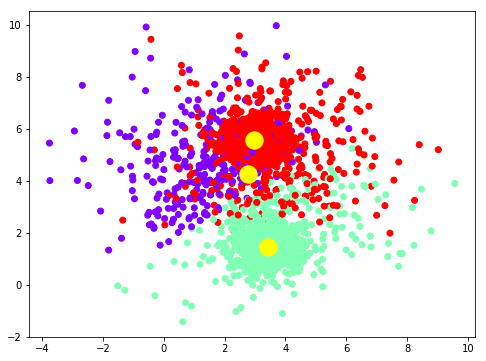

In [150]:
# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred , cmap='rainbow')
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], s=300, c='yellow')#centers of clusters
plt.show()